In [121]:
# import the necessary utilities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [122]:
# import the datasets

bike_data = pd.read_csv('data/totalData.csv')
bike_data = bike_data.fillna(0)
bike_data

,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Precip (mm),Snow on Grnd (cm),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Wind Chill,Berri1,Maisonneuve_2,Maisonneuve_1
0,2009.0,1.0,1.0,-14.7,-19.9,-17.3,0.0,0.0,-23.125000,59.916667,28.291667,17.375000,-25.875000,29.0,35.0,20.0
1,2009.0,1.0,2.0,-11.3,-16.2,-13.8,1.0,0.0,-17.029167,76.250000,7.083333,12.250000,-19.458333,19.0,22.0,3.0
2,2009.0,1.0,3.0,-8.1,-13.0,-10.6,0.0,0.0,-15.441667,67.958333,28.208333,22.541667,-18.708333,24.0,22.0,12.0
3,2009.0,1.0,4.0,-8.3,-13.8,-11.1,0.0,0.0,-16.366667,66.958333,25.333333,13.375000,-17.875000,24.0,15.0,8.0
4,2009.0,1.0,5.0,-1.9,-9.2,-5.6,0.0,0.0,-10.387500,71.708333,24.500000,17.291667,-11.541667,120.0,141.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,2019.0,12.0,27.0,3.4,-4.4,-0.5,5.9,2.0,-2.087500,91.666667,13.458333,11.791667,-4.208333,93.0,0.0,35.0
4013,2019.0,12.0,28.0,4.0,-1.3,1.3,0.0,2.0,-1.595833,75.916667,25.000000,16.416667,-0.166667,163.0,0.0,89.0
4014,2019.0,12.0,29.0,0.9,-2.7,-0.9,0.0,2.0,-5.262500,73.458333,12.958333,10.875000,-3.791667,147.0,0.0,93.0
4015,2019.0,12.0,30.0,-0.7,-3.9,-2.3,13.4,2.0,-5.233333,81.083333,5.041667,20.041667,-8.000000,128.0,0.0,48.0


In [123]:
# Remove the dates and wind chill

bike_data = bike_data.drop(labels=['Year', 'Month', 'Day', 'Wind Chill'],axis=1)
bike_data

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Precip (mm),Snow on Grnd (cm),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Berri1,Maisonneuve_2,Maisonneuve_1
0,-14.7,-19.9,-17.3,0.0,0.0,-23.125000,59.916667,28.291667,17.375000,29.0,35.0,20.0
1,-11.3,-16.2,-13.8,1.0,0.0,-17.029167,76.250000,7.083333,12.250000,19.0,22.0,3.0
2,-8.1,-13.0,-10.6,0.0,0.0,-15.441667,67.958333,28.208333,22.541667,24.0,22.0,12.0
3,-8.3,-13.8,-11.1,0.0,0.0,-16.366667,66.958333,25.333333,13.375000,24.0,15.0,8.0
4,-1.9,-9.2,-5.6,0.0,0.0,-10.387500,71.708333,24.500000,17.291667,120.0,141.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4012,3.4,-4.4,-0.5,5.9,2.0,-2.087500,91.666667,13.458333,11.791667,93.0,0.0,35.0
4013,4.0,-1.3,1.3,0.0,2.0,-1.595833,75.916667,25.000000,16.416667,163.0,0.0,89.0
4014,0.9,-2.7,-0.9,0.0,2.0,-5.262500,73.458333,12.958333,10.875000,147.0,0.0,93.0
4015,-0.7,-3.9,-2.3,13.4,2.0,-5.233333,81.083333,5.041667,20.041667,128.0,0.0,48.0


In [124]:
# Exclude outliers 
# two accuracies: large bins + small bins/many bins

To_categorize = np.arange(0,80,4)


bike_data = bike_data.assign(Berri1=pd.cut(bike_data['Berri1'], 
                               bins=np.arange(-1,8000,400), 
                               labels=To_categorize))
bike_data = bike_data.assign(Maisonneuve_2=pd.cut(bike_data['Maisonneuve_2'], 
                               bins=np.arange(-1,8000,400), 
                               labels=To_categorize))
bike_data = bike_data.assign(Maisonneuve_1=pd.cut(bike_data['Maisonneuve_1'], 
                               bins=np.arange(-1,8000,400), 
                               labels=To_categorize))

In [125]:
bike_data

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Precip (mm),Snow on Grnd (cm),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Berri1,Maisonneuve_2,Maisonneuve_1
0,-14.7,-19.9,-17.3,0.0,0.0,-23.125000,59.916667,28.291667,17.375000,0,0,0
1,-11.3,-16.2,-13.8,1.0,0.0,-17.029167,76.250000,7.083333,12.250000,0,0,0
2,-8.1,-13.0,-10.6,0.0,0.0,-15.441667,67.958333,28.208333,22.541667,0,0,0
3,-8.3,-13.8,-11.1,0.0,0.0,-16.366667,66.958333,25.333333,13.375000,0,0,0
4,-1.9,-9.2,-5.6,0.0,0.0,-10.387500,71.708333,24.500000,17.291667,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4012,3.4,-4.4,-0.5,5.9,2.0,-2.087500,91.666667,13.458333,11.791667,0,0,0
4013,4.0,-1.3,1.3,0.0,2.0,-1.595833,75.916667,25.000000,16.416667,0,0,0
4014,0.9,-2.7,-0.9,0.0,2.0,-5.262500,73.458333,12.958333,10.875000,0,0,0
4015,-0.7,-3.9,-2.3,13.4,2.0,-5.233333,81.083333,5.041667,20.041667,0,0,0


In [126]:
columns_to_normalize = ['Max Temp (°C)',
                         'Min Temp (°C)',
                         'Mean Temp (°C)',
                         'Total Precip (mm)',
                         'Snow on Grnd (cm)',
                         'Dew Point Temp (°C)',
                         'Rel Hum (%)',
                         'Wind Dir (10s deg)',
                         'Wind Spd (km/h)']

In [127]:
std_scaler = StandardScaler()
features = bike_data[columns_to_normalize]
scaled_features = std_scaler.fit_transform(features)
scaled_features = pd.DataFrame(scaled_features, index=bike_data.index)
scaled_features.columns = columns_to_normalize
bike_data[columns_to_normalize] = scaled_features
bike_data = bike_data.dropna()

In [128]:
from sklearn.metrics import accuracy_score
X = bike_data.drop(labels=['Berri1', 'Maisonneuve_2', 'Maisonneuve_1'],axis=1)
y_Berri1 = bike_data['Berri1']
y_Maisonneuve_2 = bike_data['Maisonneuve_2']
y_Maisonneuve_1 = bike_data['Maisonneuve_1']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y_Berri1, test_size = 0.25) # 0.08 to try

knn = KNeighborsClassifier(n_neighbors=80, weights='distance',p=1)
knn.fit(X_train,y_train)
pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('training set accuracy', acc_train.round(3))
print('test set accuracy', acc_test.round(3))


precision = precision_score(y_test, pred_test, average="macro", zero_division=0) # for each classes
print("precision: ",precision.round(3))
recall = recall_score(y_test, pred_test, average="macro", zero_division=0) # for each classes
print("recall: ",recall.round(3))
confusion = confusion_matrix(y_test, pred_test)
print("confusion: \n",confusion)

training set accuracy 0.997
test set accuracy 0.338
precision:  0.148
recall:  0.145
confusion: 
 [[232  34   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
    0]
 [ 53  43   1   6   2   0   0   0   0   0   0   0   0   0   0   0   1   0
    0]
 [ 15  18   3   8   3   2   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [ 10  16   1   9   3   2   0   3   1   0   0   0   3   0   0   0   0   0
    0]
 [  8   9   4  11   1   1   0   2   2   0   2   1   0   3   1   0   0   0
    0]
 [  8   7   2   5   3   3   0   3   1   0   1   1   3   2   0   0   0   0
    0]
 [  9   5   1   5   1   1   0   5   0   1   1   4   2   7   0   3   1   0
    0]
 [  8   4   1   5   2   1   1   3   2   1   2   2   2   5   0   2   1   0
    0]
 [  5   2   0   1   2   1   2   8   6   0   4   0   2   4   1   4   0   0
    0]
 [  4   1   0   3   0   1   0   5   4   2   3   2   2   7   5   2   0   0
    0]
 [  6   0   0   4   0   0   1   1   1   1   1   2   6  22   2   5   1   0
    0]
 [  6   0  

In [130]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(knn, X, y_Berri1, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('10-fold Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

10-fold Accuracy: 0.331 (0.011)


In [131]:
items_in_ytest = set(y_test)
n_items = len(items_in_ytest)

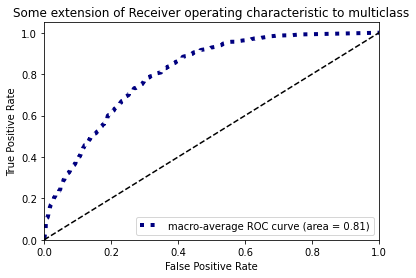

In [132]:
#check the classes in y_test

#y_test_list = list(set(y_test))

"""
blablabla
"""
pred_prob = knn.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}

for i in range(n_items):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_items)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_items):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_items

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()